In [1]:
#单纯形法
# -*- encoding: utf-8 -*-
import re
import sys
import numpy as np
import copy
from importlib import reload

class SimplexAlgorithm(object):
    """
    Implement of Simplex Algorithm
    """

    def __init__(self, A, b, c):
        """
        A = constraint Matrix
        I = slack Matrix
        b = constraint 
        c = objective coefficient
        """
        A = np.array(A)
        b = np.array(b)
        c = np.array(c)
        assert len(A.shape) == 2
        assert A.shape[0] == len(b)
        assert A.shape[1] == len(c)
        M = A.shape[0]
        N = len(c)

        a = []
        for i in range(M):
            _temp = []
            for j in range(N):
                _temp.append(A[i, j])

            # I part
            _I = [0] * M
            _I[i] = 1.

            # b Part
            _b = [b[i]]

            _temp += _I + _b 
            a.append(_temp)

        # c part
        a.append(list(c) + [0] * (M + 1))
        print ("Construct Matrix: ")
        for ele in a:
            for ent in ele:
                print (ent)
            #print '\t'.join([str(ent) for ent in ele])
        #print ("---------")

        self.matrix = a
        self.N = N
        self.M = M

    def pivot(self, x, y):
        """
        """
        for i in range(self.M + 1):
            for j in range(self.M + self.N + 1):
                if (x != i and j != y):
                    self.matrix[i][j] -= self.matrix[x][j] * self.matrix[i][y] / self.matrix[x][y]

        # zero out column y
        for i in range(self.M + 1):
            if (i != x): self.matrix[i][y] = 0.0

        # scale row x
        for j in range(self.M + self.N + 1):
            if (j != y): self.matrix[x][j] /= self.matrix[x][y]

        self.matrix[x][y] = 1.

    def solve(self):
        """
        """
        while True:
            p, q = 0, 0
            for q in range(self.M + self.N + 1):
                if (self.matrix[self.M][q] > 0): break # positive objective coefficient
            if (q >= self.M + self.N): break

            for p in range(self.M):
                if self.matrix[p][q] > 0: break

            for i in range(p+1, self.M):
                if self.matrix[i][q] > 0:
                    # min ratio test
                    if (self.matrix[i][self.M + self.N] / self.matrix[i][q] < 
                        self.matrix[p][self.M + self.N] / self.matrix[p][q]):
                        p = i

            self.pivot(p, q)
        return self.matrix

if __name__ == "__main__":
    reload(sys)
    #sys.set("utf-8")

    # value should be float type
    A = [[5., 15.], [4., 4.], [35., 20.]]
    c = [13., 23.]
    b = [480., 160., 1190.]

    instance = SimplexAlgorithm(A, b, c)
    res = instance.solve()

    print ("Result: ")
    for ele in res:
        for ent in ele:           
            print (ent)
        #print '\t'.join([str(ent) for ent in ele])


Construct Matrix: 
5.0
15.0
1.0
0
0
480.0
4.0
4.0
0
1.0
0
160.0
35.0
20.0
0
0
1.0
1190.0
13.0
23.0
0
0
0
0
Result: 
0.0
0.0
1.5000000000000004
-10.625
1.0
210.00000000000006
0.0
1.0
0.10000000000000002
-0.1250000000000001
0.0
28.0
1.0
0.0
-0.1
0.37499999999999994
0.0
11.999999999999998
0.0
0.0
-1.0
-2.0
0.0
-800.0


In [6]:
A = np.array([[14,  5, -3, -5],
       [ 5, 10, -7, -5],
       [-3, -7, 24,  2],
       [-5, -5,  2, 14]])
B = np.linalg.eigvals(A)
B

array([30.39839932, 17.69361512,  8.97355602,  4.93442953])

第 1 次迭代: [[-43.10227273]]
第 2 次迭代: [[-43.64169495]]
第 3 次迭代: [[-43.71262547]]
第 4 次迭代: [[-43.72195238]]
第 5 次迭代: [[-43.7231788]]
第 6 次迭代: [[-43.72334007]]
第 7 次迭代: [[-43.72336128]]
第 8 次迭代: [[-43.72336406]]
第 9 次迭代: [[-43.72336443]]
第 10 次迭代: [[-43.72336448]]
第 11 次迭代: [[-43.72336449]]
第 12 次迭代: [[-43.72336449]]
第 13 次迭代: [[-43.72336449]]
第 14 次迭代: [[-43.72336449]]
第 15 次迭代: [[-43.72336449]]
第 16 次迭代: [[-43.72336449]]
第 17 次迭代: [[-43.72336449]]
第 18 次迭代: [[-43.72336449]]
第 19 次迭代: [[-43.72336449]]
第 20 次迭代: [[-43.72336449]]
第 21 次迭代: [[-43.72336449]]
第 22 次迭代: [[-43.72336449]]
第 23 次迭代: [[-43.72336449]]
第 24 次迭代: [[-43.72336449]]
第 25 次迭代: [[-43.72336449]]
第 26 次迭代: [[-43.72336449]]
第 27 次迭代: [[-43.72336449]]
第 28 次迭代: [[-43.72336449]]
第 29 次迭代: [[-43.72336449]]
第 30 次迭代: [[-43.72336449]]
第 31 次迭代: [[-43.72336449]]
第 32 次迭代: [[-43.72336449]]
第 33 次迭代: [[-43.72336449]]
第 34 次迭代: [[-43.72336449]]
第 35 次迭代: [[-43.72336449]]
第 36 次迭代: [[-43.72336449]]
第 37 次迭代: [[-43.72336449]]
第 38 次迭代: [

第 602 次迭代: [[-43.72336449]]
第 603 次迭代: [[-43.72336449]]
第 604 次迭代: [[-43.72336449]]
第 605 次迭代: [[-43.72336449]]
第 606 次迭代: [[-43.72336449]]
第 607 次迭代: [[-43.72336449]]
第 608 次迭代: [[-43.72336449]]
第 609 次迭代: [[-43.72336449]]
第 610 次迭代: [[-43.72336449]]
第 611 次迭代: [[-43.72336449]]
第 612 次迭代: [[-43.72336449]]
第 613 次迭代: [[-43.72336449]]
第 614 次迭代: [[-43.72336449]]
第 615 次迭代: [[-43.72336449]]
第 616 次迭代: [[-43.72336449]]
第 617 次迭代: [[-43.72336449]]
第 618 次迭代: [[-43.72336449]]
第 619 次迭代: [[-43.72336449]]
第 620 次迭代: [[-43.72336449]]
第 621 次迭代: [[-43.72336449]]
第 622 次迭代: [[-43.72336449]]
第 623 次迭代: [[-43.72336449]]
第 624 次迭代: [[-43.72336449]]
第 625 次迭代: [[-43.72336449]]
第 626 次迭代: [[-43.72336449]]
第 627 次迭代: [[-43.72336449]]
第 628 次迭代: [[-43.72336449]]
第 629 次迭代: [[-43.72336449]]
第 630 次迭代: [[-43.72336449]]
第 631 次迭代: [[-43.72336449]]
第 632 次迭代: [[-43.72336449]]
第 633 次迭代: [[-43.72336449]]
第 634 次迭代: [[-43.72336449]]
第 635 次迭代: [[-43.72336449]]
第 636 次迭代: [[-43.72336449]]
第 637 次迭代: [[-43.723

第 1161 次迭代: [[-43.72336449]]
第 1162 次迭代: [[-43.72336449]]
第 1163 次迭代: [[-43.72336449]]
第 1164 次迭代: [[-43.72336449]]
第 1165 次迭代: [[-43.72336449]]
第 1166 次迭代: [[-43.72336449]]
第 1167 次迭代: [[-43.72336449]]
第 1168 次迭代: [[-43.72336449]]
第 1169 次迭代: [[-43.72336449]]
第 1170 次迭代: [[-43.72336449]]
第 1171 次迭代: [[-43.72336449]]
第 1172 次迭代: [[-43.72336449]]
第 1173 次迭代: [[-43.72336449]]
第 1174 次迭代: [[-43.72336449]]
第 1175 次迭代: [[-43.72336449]]
第 1176 次迭代: [[-43.72336449]]
第 1177 次迭代: [[-43.72336449]]
第 1178 次迭代: [[-43.72336449]]
第 1179 次迭代: [[-43.72336449]]
第 1180 次迭代: [[-43.72336449]]
第 1181 次迭代: [[-43.72336449]]
第 1182 次迭代: [[-43.72336449]]
第 1183 次迭代: [[-43.72336449]]
第 1184 次迭代: [[-43.72336449]]
第 1185 次迭代: [[-43.72336449]]
第 1186 次迭代: [[-43.72336449]]
第 1187 次迭代: [[-43.72336449]]
第 1188 次迭代: [[-43.72336449]]
第 1189 次迭代: [[-43.72336449]]
第 1190 次迭代: [[-43.72336449]]
第 1191 次迭代: [[-43.72336449]]
第 1192 次迭代: [[-43.72336449]]
第 1193 次迭代: [[-43.72336449]]
第 1194 次迭代: [[-43.72336449]]
第 1195 次迭代: [[

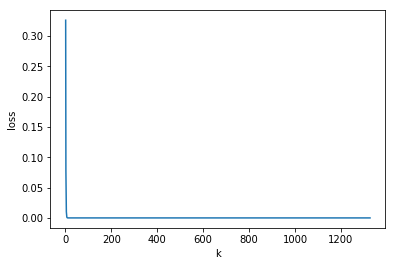

In [22]:
#最速下降法
import numpy as np
import matplotlib.pyplot as plt

def SteepestDescent(A, x, b):
    global x_all, k_all
    x_all = [] 
    k_all = []
    k = 0
    gradient = np.dot(A, x) - b
    
    while True:
        k +=1
        alpha = np.dot(gradient.T, gradient) / np.dot(np.dot(gradient.T, A), gradient)
        old_x = x
        x = old_x - alpha * gradient
        gradient = np.dot(A, x) - b
        f = 1/2 * np.dot(np.dot(x.T,A),x) - np.dot(b.T, x) 
        print("第",k,"次迭代:",f)
        x_all.append(x)
        k_all.append(k)
        if k> 1326:
            print("Gradient Descent Fishend!")
            return x
        
A = np.array([[44,-9],
             [-9,14]])

x = np.array([[1,1]]).T
b = np.array([[54,5]]).T      
SteepestDescent(A, x, b)        

loss_all = []

for x in x_all:
    loss = np.linalg.norm(x - x_all[-1])
    loss_all.append(loss)
    
plt.plot(k_all, loss_all)
plt.xlabel("k")
plt.ylabel("loss")
plt.savefig('SteepestDescent.png')

In [13]:
3-1.49719622

1.50280378